In [1]:
import sys
import os
#Eu tava apanhando pra entender como eu importaria aqui o KNN, achei essa solucao aqui!
sys.path.append(os.path.abspath(".."))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from algorithms.rn import RN


In [3]:
df = pd.read_csv("../data/dados.preprocessados.csv")
X = df.drop('income', axis=1).values  
y = df['income'].values
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

Shape de X: (45222, 77)
Shape de y: (45222,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Treino: X={X_train.shape}, y={y_train.shape}")
print(f"Teste: X={X_test.shape}, y={y_test.shape}")

Treino: X=(36177, 77), y=(36177,)
Teste: X=(9045, 77), y=(9045,)


In [5]:
rn = RN(epsilon=1.0, verbose=True)
rn.fit(X_train, y_train)

In [6]:
y_pred = rn.predict(X_test, 6)

RN Predict: 100%|██████████| 9045/9045 [27:52<00:00,  5.41sample/s]


In [7]:
acuracia = np.mean(y_pred == y_test)

print(f"   Acurácia: {acuracia:.4f} ({acuracia*100:.2f}%)")
print(f"   Total de amostras: {len(y_pred)}")
print(f"   Acertos: {np.sum(y_pred == y_test)}")
print(f"   Erros: {np.sum(y_pred != y_test)}")

   Acurácia: 0.0000 (0.00%)
   Total de amostras: 9045
   Acertos: 0
   Erros: 9045


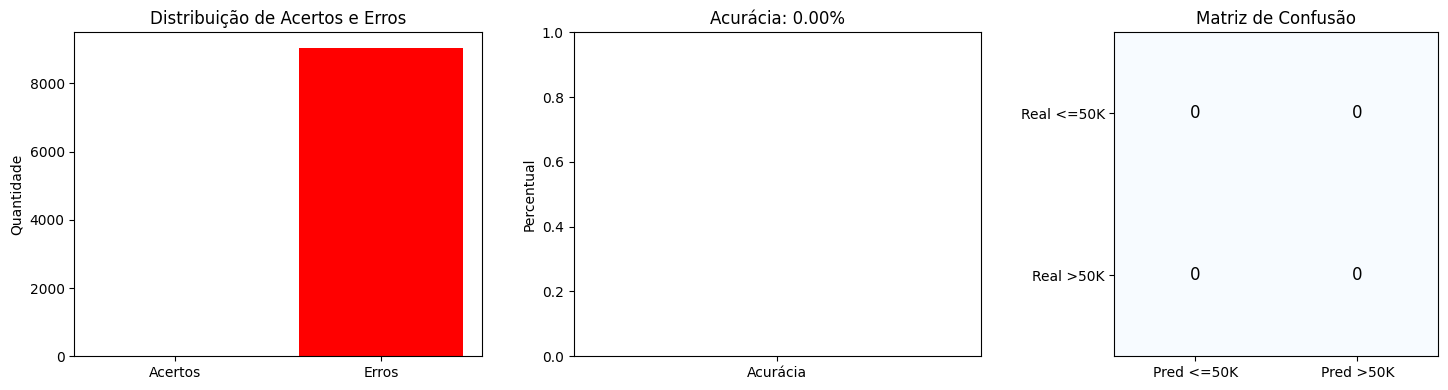


Acurácia calculada: 0.0000


In [8]:
def plotar_resultados(y_test, y_pred):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].bar(['Acertos', 'Erros'], 
                [np.sum(y_test == y_pred), np.sum(y_test != y_pred)],
                color=['green', 'red'])
    axes[0].set_title('Distribuição de Acertos e Erros')
    axes[0].set_ylabel('Quantidade')
    
    acuracia = np.mean(y_test == y_pred)
    axes[1].bar(['Acurácia'], [acuracia], color='blue')
    axes[1].set_ylim([0, 1])
    axes[1].set_title(f'Acurácia: {acuracia:.2%}')
    axes[1].set_ylabel('Percentual')
    
    tp = np.sum((y_test == 1) & (y_pred == 1))
    tn = np.sum((y_test == 0) & (y_pred == 0))
    fp = np.sum((y_test == 0) & (y_pred == 1))
    fn = np.sum((y_test == 1) & (y_pred == 0))
    
    matriz = [[tn, fp], [fn, tp]]
    im = axes[2].imshow(matriz, cmap='Blues')
    axes[2].set_title('Matriz de Confusão')
    axes[2].set_xticks([0, 1])
    axes[2].set_yticks([0, 1])
    axes[2].set_xticklabels(['Pred <=50K', 'Pred >50K'])
    axes[2].set_yticklabels(['Real <=50K', 'Real >50K'])
    
    for i in range(2):
        for j in range(2):
            axes[2].text(j, i, matriz[i][j], 
                        ha='center', va='center', color='black', fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    return acuracia

acuracia = plotar_resultados(y_test, y_pred)
print(f"\nAcurácia calculada: {acuracia:.4f}")